# Sentiment Analysis Project

## Introduction
This project involves building a sentiment analysis model to classify movie reviews as either positive or negative using natural language processing and machine learning techniques. The dataset used for this project contains 50,000 movie reviews along with their corresponding sentiment labels. The goal is to preprocess the text data, create features, and train various machine learning models to predict the sentiment of the reviews.

## Code Steps
### Step 1: Import Necessary Libraries
Import the required libraries for data manipulation, text preprocessing, machine learning modeling, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

### Step 2: Load and Explore the Dataset
Load the movie review dataset and explore its structure.

In [2]:
data = pd.read_csv("IMDB_Dataset.csv") 
print(data.head())
data.info()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Step 3: Preprocess the Text Data
Preprocess the text data by converting it to lowercase, tokenizing, removing stopwords, and stemming.

In [3]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shuba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove non-alphabetic words
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords (common words like 'and', 'the', 'is', etc.)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    
    # Apply stemming to reduce words to their root form
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join the preprocessed words back into a string
    return ' '.join(tokens)

In [5]:
data['cleaned_text'] = data['review'].apply(preprocess_text)

### Step 4: Perform Data Visualization and EDA (Optional)
Visualize the distribution of sentiments and generate word clouds for positive and negative reviews.

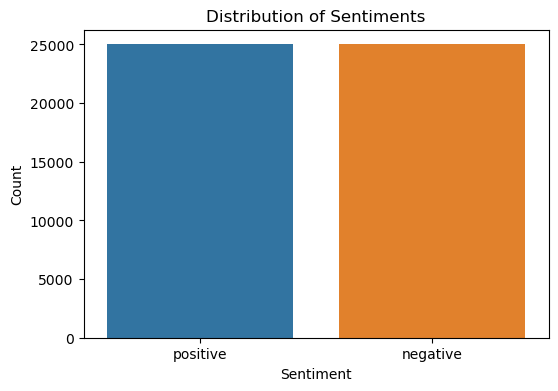

In [6]:
# Visualize the distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


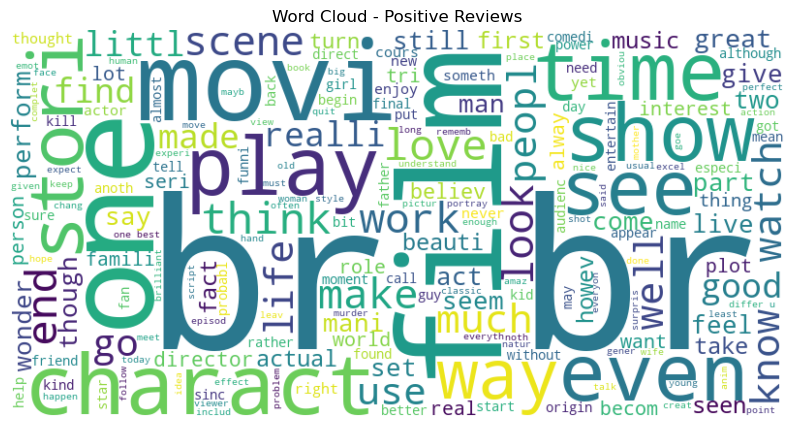

In [7]:
# Visualize the word cloud of positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['cleaned_text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()


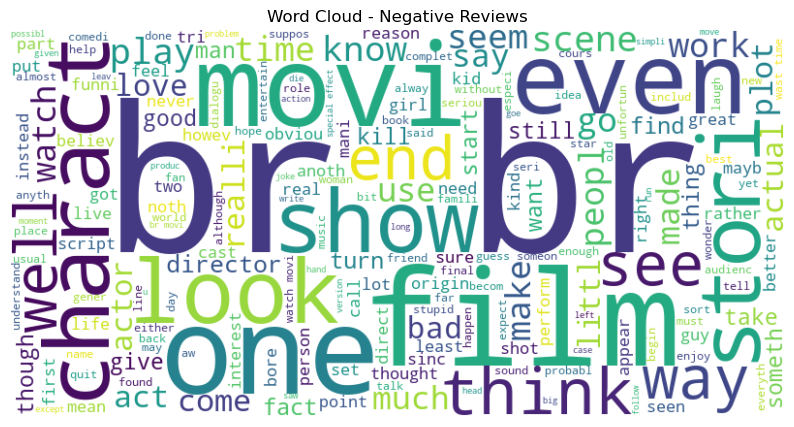

In [8]:
# Visualize the word cloud of negative reviews
negative_reviews = data[data['sentiment'] == 'negative']['cleaned_text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

### Step 5: TF-IDF Vectorization and Naive Bayes Classification
Convert the cleaned text data into TF-IDF vectors and train a Naive Bayes classifier.

In [9]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['sentiment']


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [11]:
# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Step 6: Hyperparameter Tuning with Naive Bayes
Perform hyperparameter tuning using grid search to optimize the Naive Bayes model.

In [12]:
param_grid = {'alpha': [0.1, 1, 10]}
nb_model = MultinomialNB()

grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)


{'alpha': 10}
0.8506


### Step 7: Ensemble Voting Classifier
Create an ensemble voting classifier by combining Naive Bayes and Random Forest models.

In [13]:
nb_model = MultinomialNB(alpha=10)
rf_model = RandomForestClassifier(n_estimators=100)

voting_clf = VotingClassifier(estimators=[('nb', nb_model), ('rf', rf_model)], voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('nb', MultinomialNB(alpha=10)),
                             ('rf', RandomForestClassifier())])

In [14]:
# Make predictions on the test set
y_pred_vc = voting_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_vc))


              precision    recall  f1-score   support

    negative       0.80      0.92      0.85      4961
    positive       0.90      0.77      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



### Step 8: SVM Classifier with Word2vec embeddings
Create an svm classifier and train it.

In [15]:
# Preprocess and create sentences from each review's cleaned text
sentences = [text.split() for text in data['cleaned_text']]

# Train the Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
w2v_model.save("word2vec.model")

# Convert the original text data in data['cleaned_text'] to Word2Vec vectors
X_w2v = np.array([np.mean([w2v_model.wv[word] for word in doc.split()], axis=0) for doc in data['cleaned_text']])


In [19]:
# Split the data into training and testing subsets
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Train the SVM classifier on the Word2Vec embeddings
svm_classifier = SVC(kernel='linear',C=0.1)
svm_classifier.fit(X_train_w2v, y_train)

# Make predictions
y_pred_w2v = svm_classifier.predict(X_test_w2v)

# Print classification report
print("Classification Report using Word2Vec:\n", classification_report(y_test, y_pred_w2v))


Classification Report using Word2Vec:
               precision    recall  f1-score   support

    negative       0.86      0.85      0.85      4961
    positive       0.85      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Step 9: Hyperparameter Tuning SVM Classifier with Word2vec embeddings
Perform hyperparameter tuning using grid search to optimize the svm classifier model.

In [17]:
param_grid_svm = {'C': [0.1, 1]}
svm_model = SVC(kernel='linear')
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_w2v, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Params for SVM with Word2Vec:", best_params_svm)
print("Best Score for SVM with Word2Vec:", best_score_svm)


Best Params for SVM with Word2Vec: {'C': 0.1}
Best Score for SVM with Word2Vec: 0.8586


### Step 8: Model Evaluation and Comparison
Evaluate and compare the performance of the Naive Bayes, Voting Classifier, and SVM model with Word2Vec embeddings.

In [24]:
# Compare Model Performances

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

# Evaluate Voting Classifier
vc_accuracy = accuracy_score(y_test, y_pred_vc)
print("Voting Classifier Accuracy:", vc_accuracy)

# Evaluate SVM with Word2Vec
svm_accuracy = accuracy_score(y_test, y_pred_w2v)
print("SVM with Word2Vec Accuracy:", svm_accuracy)

# Choose the best performing model
best_model = None
if nb_accuracy > vc_accuracy and nb_accuracy > svm_accuracy:
    best_model = nb_classifier
elif vc_accuracy > nb_accuracy and vc_accuracy > svm_accuracy:
    best_model = voting_clf
else:
    best_model = svm_classifier

# Save the best model using joblib or other serialization methods
from joblib import dump
dump(best_model, 'best_model.joblib')


print(best_model)

Naive Bayes Accuracy: 0.848
Voting Classifier Accuracy: 0.8427
SVM with Word2Vec Accuracy: 0.8536
SVC(C=0.1, kernel='linear')
